# Decision Tree Modelling

In [64]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [65]:
df = pd.read_excel('Threshold_Data.xlsx')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Total_Children,Total_Spent,BuyingPower,TotalPurchases,Dt_CustomerConverted,SinceEnrolled,Interest,CLV,AOV,AppliedPromo
0,0,1826,1970,Graduation,Single,84835.0,0,0,2014-06-16,0,...,0,1190,84240.0,15,2014-06-16,3543,1,5775.575342,79.333333,887.8
1,1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,...,0,577,56802.5,18,2014-06-15,3544,5,2801.216438,32.055556,715.0
2,2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,...,1,251,67141.5,11,2014-05-13,3577,2,1229.900000,22.818182,587.4
3,3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,...,2,11,32468.5,4,2014-11-05,3401,7,51.247945,2.750000,503.4
4,4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,...,1,91,21428.5,8,2014-08-04,3494,7,435.553425,11.375000,521.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,2235,10142,1976,PhD,Single,66476.0,0,1,2013-07-03,99,...,1,689,66131.5,20,2013-07-03,3891,103,3672.464384,34.450000,743.4
2215,2236,5263,1977,n_Cycle,Married,31056.0,1,0,2013-01-22,99,...,1,55,31028.5,5,2013-01-22,4053,107,305.363014,11.000000,514.6
2216,2237,22,1976,Graduation,Single,46310.0,1,0,2012-03-12,99,...,1,309,46155.5,14,2012-03-12,4369,107,1849.343836,22.071429,617.0
2217,2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,...,0,1383,65127.5,20,2012-11-29,4107,102,7780.795890,69.150000,1027.0


In [66]:
selected_columns = [
    'Age',
    'Marital_Status',
    'Education',
    'Income', 
    'Kidhome', 
    'Teenhome',
    'Recency',
    # 'Dt_Customer',
    'MntFishProducts', 
    'MntMeatProducts', 
    # 'MntFruits', 
    # 'MntSweetProducts', 
    'MntWines', 
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    # 'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Total_Children',
    'HouseHoldMembers',
    # 'Total_Spent',
    # 'BuyingPower',
    # 'TotalPurchases',
    'SinceEnrolled',
    # 'Dt_CustomerConverted',
    'Response',
    # 'Interest',
    'AOV',
    'CLV',
    # 'Complain'
]
df = df[selected_columns]

In [67]:
# One Hot Encode the Marital Status and the Education
def one_hot_encode(data, column, suffix=''):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded, lsuffix='_data', rsuffix='_encoded')
    # data = data.join(encoded)
    return data
df = one_hot_encode(df, 'Marital_Status')
df = one_hot_encode(df, 'Education')

In [68]:
X = df.drop('Response', axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

oversampler = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

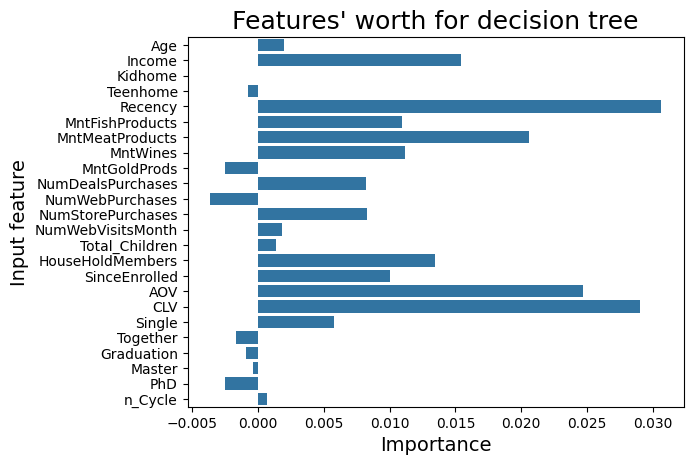

Recency: 0.030630630630630578
CLV: 0.029029029029028982
AOV: 0.02467467467467462
MntMeatProducts: 0.02057057057057052
Income: 0.015415415415415364
HouseHoldMembers: 0.013413413413413355
MntWines: 0.011161161161161112
MntFishProducts: 0.010910910910910869
SinceEnrolled: 0.010010010010009973
NumStorePurchases: 0.008258258258258211
NumDealsPurchases: 0.008208208208208168
Single: 0.005755755755755713
Age: 0.001951951951951895
NumWebVisitsMonth: 0.0018518518518518047
Total_Children: 0.0013513513513513005
n_Cycle: 0.000650650650650612
Kidhome: 0.0
Master: -0.0004004004004004173
Teenhome: -0.0007507507507507616
Graduation: -0.0009009009009009139
Together: -0.0017017017017017264
PhD: -0.0025025025025025385
MntGoldProds: -0.002502502502502546
NumWebPurchases: -0.0036536536536537025


In [69]:
# Create a ColumnTransformer for scaling
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline


# Use a pipeline to include the preprocessing step and the logistic regression model
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

# Fit the pipeline
pipeline.fit(X_train_resampled, y_train_resampled)

# Now, use the pipeline for permutation importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=0)

feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

sns.barplot(y=X.columns, x=feature_importances)
plt.title("Features' worth for decision tree", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Importance", fontsize=14)

plt.show()

# Print feature importance ranking
for idx in feature_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")

## Determine the best Hyperparamters

In [70]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)

# # Define the parameter grid
# param_grid = {
#     'max_depth': [5, 10, 15],
#     'max_leaf_nodes': [5, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 14],
#     'min_samples_leaf': [1, 2, 4, 7]
# }

# # Create the decision tree classifier
# dt_classifier = DecisionTreeClassifier(random_state=0, criterion='entropy')

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='f1')
# grid_search.fit(X_train_resampled, y_train_resampled)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# print(best_params)


In [71]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=10,
  max_leaf_nodes=30,
  min_samples_split=7, 
  min_samples_leaf=2)
clf.fit(X_train_resampled, y_train_resampled)
train_preds = clf.predict(X_train_resampled)
preds = clf.predict(scaler.transform(X_test))

## Train Scores

In [72]:
acc = accuracy_score(y_train_resampled, train_preds)
prec = precision_score(y_train_resampled, train_preds)
rec = recall_score(y_train_resampled, train_preds)
f1 = f1_score(y_train_resampled, train_preds)
auc = roc_auc_score(y_train_resampled, train_preds)

In [73]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8531
Precision: 0.8129
Recall: 0.9175
F1: 0.8620
AUC: 0.8531


## Test Scores

In [74]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [75]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.7538
Precision: 0.3350
Recall: 0.6667
F1: 0.4459
AUC: 0.7178


In [76]:
from sklearn.tree import plot_tree


plt.figure(figsize=(100,100))
plot_tree(clf, 
          feature_names = list(X.columns),
          class_names = ['No', 'Yes'],
          filled = True)
plt.show()

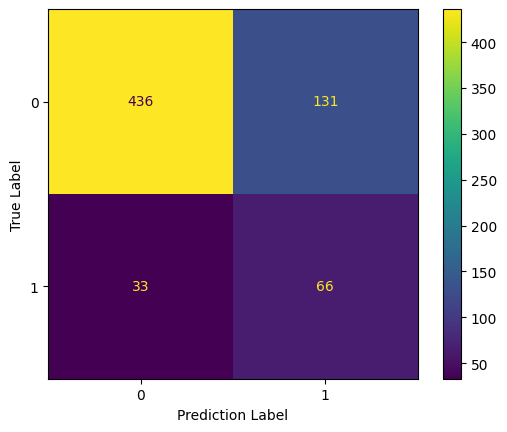

In [77]:
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
# plt.title('Did the customer say yes?')
plt.xlabel('Prediction Label')
plt.ylabel('True Label')
plt.show()

In [78]:
# results_df = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
# incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]
# all_incorrect_rows = df.iloc[incorrect_predictions.index]
# all_incorrect_rows = pd.merge(incorrect_predictions, df, left_index=True, right_index=True)

# # Display Rows for Incorrect Predictions
# print("Rows with Incorrect Predictions:")
# all_incorrect_rows[0:20]